In [34]:
import mylibrary.nnlib as tnn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

(200, 2) (200, 1)


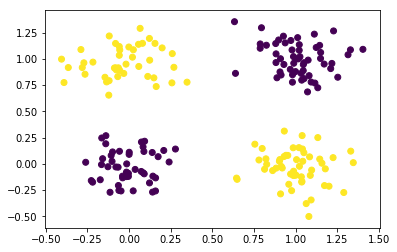

In [35]:
T,F = 1., 0.
xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.15, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [40]:
net = tnn.AutoForm(new_layers=True)
optimizer = tnn.Adam(learning_rate=0.01)
layer1 = tnn.NonLinearLayer(2, 4, activation=tnn.Relu())
layer2 = tnn.NonLinearLayer(4, 1, activation=tnn.Sigmoid())
loss_func = tnn.CrossEntropyBinary()

In [41]:
net.layerList

In [42]:
def normalize_weight_vectorwise(matrix): ## takes input weight of numpy ndarray
    for i in range(matrix.shape[1]):
        matrix[:,i] = matrix[:,i]/np.linalg.norm(matrix[:,i], ord=2)
    return matrix

In [43]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    yout = net.forward(x)
    
    loss = loss_func.loss(yout, y)
    dy = loss_func.del_loss(yout, y)
    
    dx = net.backward(dy)
    net.update()
#     normalize_weight_vectorwise(layer1.weights)
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        out = (yout>0.5).astype(int)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1))
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.8798259048938308


_______________________
epoch 100
Loss 0.7995340758115083


_______________________
epoch 200
Loss 0.7217641349919302


_______________________
epoch 300
Loss 0.6821967210701493


_______________________
epoch 400
Loss 0.6560106775325343


_______________________
epoch 500
Loss 0.6349556860192938


_______________________
epoch 600
Loss 0.6181939464436919


_______________________
epoch 700
Loss 0.6049477304627604


_______________________
epoch 800
Loss 0.594282287433489


_______________________
epoch 900
Loss 0.585539770652324


_______________________
epoch 1000
Loss 0.5781691080513953


_______________________
epoch 1100
Loss 0.571760678187794


_______________________
epoch 1200
Loss 0.5660035394260954


_______________________
epoch 1300
Loss 0.5606748566767029


_______________________
epoch 1400
Loss 0.5556653454352768


_______________________
epoch 1500
Loss 0.5508854816916111


_______________________
epoch 1600
Loss



_______________________
epoch 13400
Loss 0.2128871871012045


_______________________
epoch 13500
Loss 0.21188477461823857


_______________________
epoch 13600
Loss 0.210893951054985


_______________________
epoch 13700
Loss 0.20991453742635785


_______________________
epoch 13800
Loss 0.20894626892532003


_______________________
epoch 13900
Loss 0.2079889933307254


_______________________
epoch 14000
Loss 0.20704327370189446


_______________________
epoch 14100
Loss 0.206108151601626


_______________________
epoch 14200
Loss 0.2051831488734187


_______________________
epoch 14300
Loss 0.20426845890191547


_______________________
epoch 14400
Loss 0.20336391033495838


_______________________
epoch 14500
Loss 0.20247008900854865


_______________________
epoch 14600
Loss 0.20158681527186964


_______________________
epoch 14700
Loss 0.2007129594704745


_______________________
epoch 14800
Loss 0.19984837782790932


_______________________
epoch 14900
Loss 0.1989928926659121



TclError: invalid command name "pyimage76"

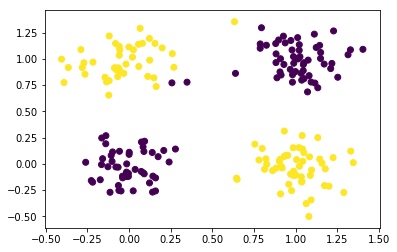

In [44]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1))

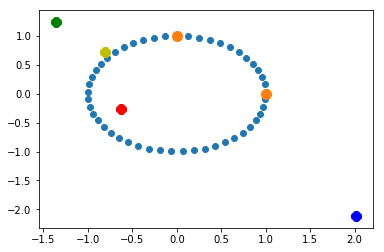

In [81]:
thetas = np.linspace(0, 2*np.pi, 50)
cx, cy = np.sin(thetas), np.cos(thetas)
plt.scatter(cx,cy)

# input_coord = np.array([[0,1],[0,-1]])
input_coord = np.array([[1,0],[0,1]])

plt.scatter(input_coord[:,0],input_coord[:,1], lw=5)
# l1_coord = 
zz = layer1.weights
# zz= (input_coord@layer1.weights)
plt.scatter(zz[0], zz[1], c=[0,1,2,3], cmap=matplotlib.colors.ListedColormap(['b','g','y','r']), marker='P', lw=5)

In [72]:
layer1.weights

array([[ 2.02036035, -1.36400207, -0.80325728, -0.63254436],
       [-2.11806936,  1.23999505,  0.72977188, -0.26007385]])

In [68]:
def get_arranged_weight(inputs, weights):
    dd = input_coord.T@layer1.weights

    dd_x = np.linalg.norm(layer1.weights, axis=0)
    dd_x = -(dd_x - dd_x.max())
    dd [0] += dd_x + 0.1


array([-0.        ,  1.08373648,  1.84186722,  2.24320414])

array([[ 0.1       ,  1.18373648,  1.94186722,  2.34320414],
       [ 4.1384297 , -2.60399712, -1.53302915, -0.3724705 ]])

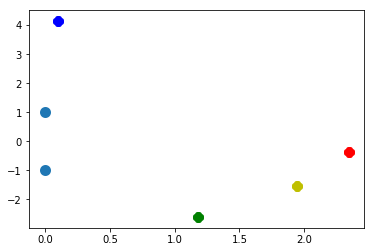

In [79]:
plt.scatter(input_coord[:,0],input_coord[:,1], lw=5)
dd = input_coord.T@layer1.weights

dd_x = np.linalg.norm(layer1.weights, axis=0)
dd_x = -(dd_x - dd_x.max())
dd [0] += dd_x + 0.1

# for wts in layer1.weights.T:
#     print((wts*input_coord).sum(axis=1)/(wts.sum()))
plt.scatter(dd[0], dd[1],c=[0,1,2,3],
            cmap=matplotlib.colors.ListedColormap(['b','g','y','r']), marker='P', lw=5)
dd

In [80]:
layer1.weights

array([[ 2.02036035, -1.36400207, -0.80325728, -0.63254436],
       [-2.11806936,  1.23999505,  0.72977188, -0.26007385]])

In [41]:
np.linalg.norm(layer1.weights[:,0]-input_coord)

3.0624677735668135